In [6]:
import numpy as np
import bettermoments as bm
import matplotlib.pyplot as plt

In [ ]:
def matrix_mine(x, y, z, warp, twist, inc_, PA_):

    #warp = warp[:, None, None]
    print("warp.shape" + str(warp.shape))
    plt.imshow(warp[:,:,0])
    plt.title("warp")
    plt.colorbar()
    plt.show()
    #twist = twist[:, None, None]
    print("twist.shape" + str(twist.shape))
    plt.imshow(twist[:,:,0])
    plt.title("twist")
    plt.show()

    cosw = np.cos(warp)
    plt.imshow(cosw[:,:,0])
    plt.title("cosw")
    plt.show()
    sinw = np.sin(warp)
    plt.imshow(sinw[:,:,0])
    plt.title("sinw")
    plt.show()
    

    cost = np.cos(twist)
    sint = np.sin(twist)

    '''just warp'''
    yp = y*cosw - z*sinw
    zp = y*sinw + z*(cosw)

    plt.pcolor(x[:,:,0], yp[:,:,0], zp[:,:,0])
    plt.title("just warp")
    plt.show()

    '''adding twist'''
    xt = x*cost - yp*sint
    yt = x*sint + yp*cost 

    plt.pcolor(xt[:,:,0], yt[:,:,0], zp[:,:,0])
    plt.title("warp & twist")
    plt.show()

    #cosPA = np.cos(PA_)
    #sinPA = np.sin(PA_)

    #cosi = np.cos(inc_)
    #sini = np.sin(inc_)

    #xp = x*(-sinPA*sint*cosi + cosPA*cost) + y*((-sinPA*cosi*cost - sint*cosPA)*cosw + sinPA*sini*sinw) + z*(-(-sinPA*cosi*cost - sint*cosPA)*sinw + sinPA*sini*cosw)
    #yp = x*(sinPA*cost + sint*cosPA*cosi) + y*((-sinPA*sint + cosPA*cosi*cost)*cosw - sini*sinw*cosPA) + z*(-(-sinPA*sint + cosPA*cosi*cost)*sinw - sini*cosPA*cosw)
    #zp = y*(sini*cost*cosw + sinw*cosi) + z*(-sini*sinw*cost + cosi*cosw)

    return xt, yt, zp

In [27]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def w_func(value, r0, dr, r, type):
    #r0 = self.w_r0
    #dr = self.w_dr

    '''same general function for warp & twist, just need to specify which param to use'''
    #if type == "w":
        #a = self.w_i

    #elif type == "pa":
        #a = self.pa

    #print("a " + str(a))
    print("r0 " + str(r0))
    print("dr " + str(dr))
    print("r max" + str(np.max(r)))
    print("r min" + str(np.min(r)))
    r0 = 1.0 if r0 is None else r0
    dr = 1.0 if dr is None else dr
    return np.radians(value / (1.0 + np.exp(-(r0 - r) / (0.1*dr))))

In [21]:
af = np.linspace(20,300,50)
pf = np.linspace(0, 2*np.pi, 50)
zf = np.linspace(-20, 20, 50)

a, p, z = np.meshgrid(af, pf, zf)

r0 100
dr 30
r max300.0
r min20.0
(50, 50, 50)
(50,)
r0 100
dr 30
r max300.0
r min20.0


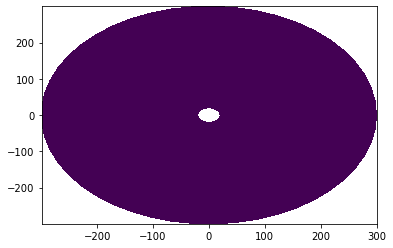

In [49]:
#plt.pcolor(a[:,:,0],p[:,:,0], z[:,:,0])
warp_i  = w_func(30, 100, 30, a, type="w")
print(warp_i.shape)
print(af.shape)
twist_i = w_func(50,100, 30, a, type="pa")

xi, yi = pol2cart(a, p)

plt.pcolor(xi[:,:,0], yi[:,:,0], z[:,:,0])

warp.shape(50, 50, 50)


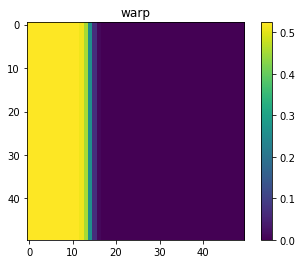

twist.shape(50, 50, 50)


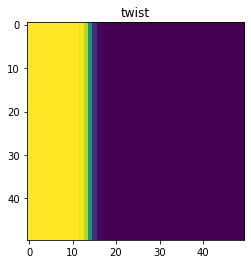

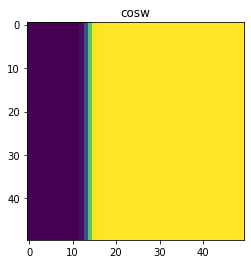

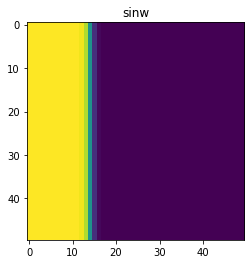

In [50]:
x_w, y_w, z_w = matrix_mine(xi, yi, z, warp_i, twist_i, 0, 0)

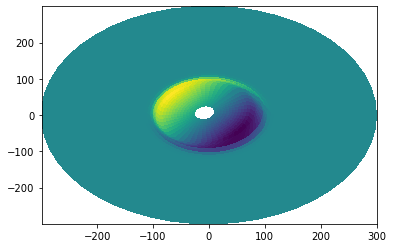

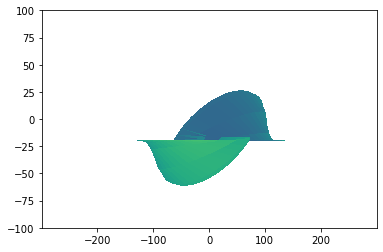

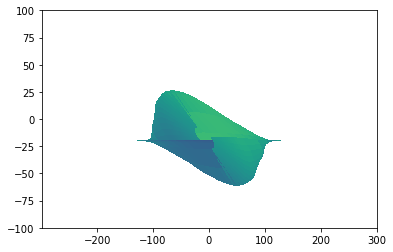

In [51]:
plt.pcolor(x_w[:,:,0], y_w[:,:,0], z_w[:,:,0])
plt.show()

plt.pcolor(y_w[:,:,0], z_w[:,:,0], x_w[:,:,0])
plt.ylim(-100,100)
plt.show()

plt.pcolor(x_w[:,:,0], z_w[:,:,0], y_w[:,:,0])
plt.ylim(-100,100)
plt.show()